## Revision 26rd july
week-4 basic concepts
### Queue and Stack

In [1]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    return self.data.pop(0)

  def __str__(self):
    return str(self.data)


q = Queue()
q.enqueue(10)
q.enqueue(20)
q.enqueue(80)
print(q.dequeue())
print(q.dequeue())
q.enqueue(30)
q.enqueue(90)
print(q.dequeue())
print(q.dequeue())
print(q.dequeue())
print(q.is_empty())

print(q)

10
20
80
30
90
True
[]


In [2]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    return self.data.pop()

  def __str__(self):
    return str(self.data)


stack = Stack()

stack.push(40)
stack.push(20)
stack.push(30)
print(stack.pop())
print(stack.pop())
print(stack.pop())
stack.is_empty()
stack.push(80)
stack.push(70)
print(stack)

30
20
40


True

[80, 70]


### Breadth First Search(BFS)

In [3]:
def bfs(adjacency_list, start_vertex):
  # initialize visited dict = {vertex: False for all vertices}
  visited = {vertex: False for vertex in adjacency_list}

  # initialize the queue, enqueue the `start_vertex`
  queue = Queue()
  queue.enqueue(start_vertex)
  # mark the `start_vertex` as visited
  visited[start_vertex] = True

  # while queue is not empty:
  while not queue.is_empty():
    # a. `curr_vertex` <- queue.dequeue()
    current_vertex = queue.dequeue()
    # b. for all neighbors of `curr_vertex`:
    for adj_vertex in adjacency_list[current_vertex]:
      # if neighbor is not visited, enqueue it to queue, mark it visited
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True

  # return visited
  return visited


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

In [20]:
def dfs(adjacency_list, start_vertex):
  # initialize visited dict = {vertex: False for all vertices}
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  # initialize the stack, push the `start_vertex`
  stack = Stack()
  # mark the `start_vertex` as visited
  stack.push(start_vertex)

  # while stack is not empty:
  while not stack.is_empty():
    # a. `curr_vertex` <- stack.pop()
    current_vertex = stack.pop()
    if not visited[current_vertex]:
      visited[current_vertex] = True
      order.append(current_vertex)
      for adj_vertex in adjacency_list[current_vertex]:
        if not visited[adj_vertex]:
          stack.push(adj_vertex)
  # return visited
  return order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adjacency_list, 0)

[0, 2, 3, 4, 1]

In [12]:
dfs({'A': ['B', 'C'], 'B': ['D'], 'C': ['D'], 'D': ['E'], 'E': ['C']}, 'A')

['A', 'C', 'D', 'E', 'B']

In [15]:
adjacency_list = {'A': ['M', 'B', 'C'],
                  'B': ['D'],
                  'C': ['D'],
                  'D': ['E'],
                  'E': ['C', 'M'],
                  'M': []}
dfs(adjacency_list, 'A')

['A', 'C', 'D', 'E', 'B', 'M']

### DFS recursion (Depth first search)

In [ ]:
def dfs_recursive(adjacency_list, curr_vertex, visited=None, order=None):
  # if visited is none, initialize visited and order
  if visited is None:
    visited = {vertex: False for vertex in adjacency_list}
    order = []

  # mark `curr_vertex` as visited
  visited[curr_vertex] = True
  # append `curr_vertex` to order
  order.append(curr_vertex)

  # for all neighbors of `curr_vertex`:
  for adj_vertex in adjacency_list[curr_vertex]:
    # if neighbor is not visited, call dfs_recursive on neighbor
    if not visited[adj_vertex]:
      dfs_recursive(adjacency_list, adj_vertex, visited, order)
  # return visited and order
  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_recursive(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 3, 4, 2])

## BFS (OPPE version)

In [5]:
def bfs(adj_list, start):
  visited = {u: False for u in adj_list}
  level = {u: 0 for u in adj_list}
  parent = {u: None for u in adj_list}
  order = []

  queue = [start]
  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True
      order.append(u)
      for v in adj_list[u]:
        if not visited[v]:
          queue.append(v)
          if parent[v] is None:
            parent[v] = u
            level[v] = level[u]+1
  return order, level, parent


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0) == ([0, 1, 2, 3, 4],
                           {0: 0, 1: 1, 2: 1, 3: 2, 4: 2},
                           {0: None, 1: 0, 2: 0, 3: 1, 4: 1})

True

In [8]:
def bfs(adj_list, start):
  visited = {u: False for u in adj_list}
  level = {u: 0 for u in adj_list}
  parent = {u: None for u in adj_list}
  order = []

  queue = [start]
  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True
      order.append(u)
      for v in adj_list[u]:
        if not visited[v]:
          queue.append(v)
          if parent[v] is None:
            parent[v] = u
            level[v] = level[u] + 1
  return order, level, parent


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0)

([0, 1, 2, 3, 4],
 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2},
 {0: None, 1: 0, 2: 0, 3: 1, 4: 1})

## DFS (oppe)

In [18]:
def dfs(adj_list, start):
  visited = {u: False for u in adj_list}
  parent = {u: None for u in adj_list}
  level = {u: 0 for u in adj_list}
  order = []

  stack = [start]
  while stack:
    u = stack.pop()
    if not visited[u]:
      visited[u] = True
      order.append(u)
      for v in adj_list[u]:
        if not visited[v]:
          stack.append(v)
          if parent[v] is None:
            parent[v] = u
            level[v] = level[u] + 1
  return order, level, parent


adjacency_list = {0: [4, 1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adjacency_list, 0)

([0, 2, 3, 4, 1],
 {0: 0, 1: 1, 2: 1, 3: 2, 4: 1},
 {0: None, 1: 0, 2: 0, 3: 2, 4: 0})

## Find Connected Components in graph using BFS

In [14]:
def bfs(adj_list, start, visited):
  component = []
  queue = [start]

  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True
      component.append(u)
      for v in adj_list[u]:
        if not visited[v]:
          queue.append(v)

  return component


def find_connected_components(adj_list):
  visited = {u: False for u in adj_list}
  components = []

  for vertex in adj_list:
    if not visited[vertex]:
      component = bfs(adj_list, vertex, visited)
      components.append(component)
  return components


adjacency_list = {
    'A': ['B'],
    'B': ['C', 'D'],
    'C': ['A'],
    'D': [],
    'E': ['F'],
    'F': [],
}

find_connected_components(adjacency_list)

[['A', 'B', 'C', 'D'], ['E', 'F']]

## Pre and Post Numbering Using DFS

In [7]:
def dfs(adjacency_list, curr_vertex, visited, pre, post, counter):
  visited[curr_vertex] = True

  pre[curr_vertex] = counter[0]
  counter[0] += 1

  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      dfs(adjacency_list, adj_vertex, visited, pre, post, counter)

  post[curr_vertex] = counter[0]
  counter[0] += 1


def pre_post_numbering(adjacency_list):
  visited = {u: False for u in adjacency_list}
  pre = {u: -1 for u in adjacency_list}
  post = {u: -1 for u in adjacency_list}
  counter = [0]

  for vertex in adjacency_list:
    if not visited[vertex]:
      dfs(adjacency_list, vertex, visited, pre, post, counter)

  return pre, post


adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: []
}

#     0
#    / \
#   1   2   5
#  / \
# 3   4

pre, post = pre_post_numbering(adjacency_list)
for vertex in adjacency_list:
  print(f'{vertex}: ({pre[vertex]}, {post[vertex]})')

0: (0, 9)
1: (1, 6)
2: (7, 8)
3: (2, 3)
4: (4, 5)
5: (10, 11)


### GRPA 1

In [3]:
def parse_my_input(my_input):
  data = my_input.strip().split('\n')

  n = int(data[0])
  adjacency_matrix = [list(map(int, data[i+1].split())) for i in range(n)]
  px = int(data[-2])
  py = int(data[-1])

  return n, adjacency_matrix, px, py

In [16]:
def convert_adj_matrix_to_list(adj_matrix):
  n = len(adj_matrix)
  adj_list = {i: [] for i in range(n)}

  for i in range(n):
    for j in range(n):
      if adj_matrix[i][j] == 1:
        adj_list[i].append(j)
  return adj_list


def bfs(adj_list, start):
  visited = {u: False for u in adj_list}
  parent = {u: None for u in adj_list}
  level = {u: 0 for u in adj_list}

  queue = [start]
  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True

    for v in adj_list[u]:
      if not visited[v]:
        queue.append(v)
        if parent[v] is None:
          parent[v] = u
          level[v] = level[u] + 1

  return level


def find_connection_level(n, adj_matrix, px, py):
  adj_list = convert_adj_matrix_to_list(adj_matrix)
  level = bfs(adj_list, px)
  return level[py]


# Gray code 👇
find_connection_level(*parse_my_input("""
15
0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1 0 1 1 1 1 0 0 0 0 0 0 0 0 0
1 1 0 1 1 1 0 0 0 0 0 0 0 0 0
0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
0 1 1 1 0 1 0 0 0 0 0 0 0 0 0
0 1 1 0 1 0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
4
11
"""))

0

## GRPA 2

In [17]:
def parse_my_input(my_input):
  data = my_input.strip().split('\n')

  V = list(map(int, data[0].split()))
  E = [list(map(int, edge.split())) for edge in data[2:]]

  return V, E

In [32]:
def bfs(adj_list, start):
  visited = {u: False for u in adj_list}
  order = []

  queue = [start]
  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True
      order.append(u)

      for v in adj_list[u]:
        if not visited[v]:
          queue.append(v)
  return visited


def find_master_tank(tanks, pipes):
  adj_list = {u: [] for u in tanks}
  for u, v in pipes:
    adj_list[u].append(v)

  for vertex in adj_list:
    visited = bfs(adj_list, vertex)
    if all(visited.values()):
      return vertex
  return 0


find_master_tank(*parse_my_input("""
1 2 3 4 5 6 7
8
1 3
2 3
3 6
4 6
4 7
7 5
5 1
5 6
"""))

0

## Topological sort

In [36]:
def dfs(adj_list, curr_vertex, visited, stack):
  visited[curr_vertex] = True

  for neighbor in adj_list[curr_vertex]:
    if not visited[neighbor]:
      dfs(adj_list, neighbor, visited, stack)

  stack.append(curr_vertex)


def topological_sort(adj_list):
  visited = {u: False for u in adj_list}
  stack = []

  for vertex in adj_list:
    if not visited[vertex]:
      dfs(adj_list, vertex, visited, stack)
  stack.reverse()
  return stack


adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: []
}

#     0
#    / \
#   1   2   5
#  / \
# 3   4

topological_sort(adjacency_list)

[5, 0, 2, 1, 4, 3]

In [37]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}
topological_sort(adjacency_list)

[1, 3, 5, 2, 7, 4, 6]

## Longest Path (DAG)

In [46]:
def longest_path(adj_list, start_vertex):
  topological_order = topological_sort(adj_list)

  distance = {u: -1 for u in adj_list}
  distance[start_vertex] = 0

  for parent in topological_order:
    if distance[parent] != -1:
      for child in adj_list[parent]:
        new_distance = distance[parent]+1
        if new_distance > distance[child]:
          distance[child] = new_distance
  return distance


adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: []
}

#     0
#    / \
#   1   2   5
#  / \
# 3   4

longest_path(adjacency_list, 0) == {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: -1}

True

In [47]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}
longest_path(adjacency_list, 1) == {1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 7: 2, 6: 3}

True

In [48]:
adj_list = {'A': ['B', 'F', 'C'],
            'B': ['C', 'D', 'E'],
            'C': ['D'],
            'D': ['E', 'H'],
            'E': [],
            'F': ['E', 'B'],
            'H': []}
longest_path(adj_list, 'A')

{'A': 0, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 1, 'H': 5}

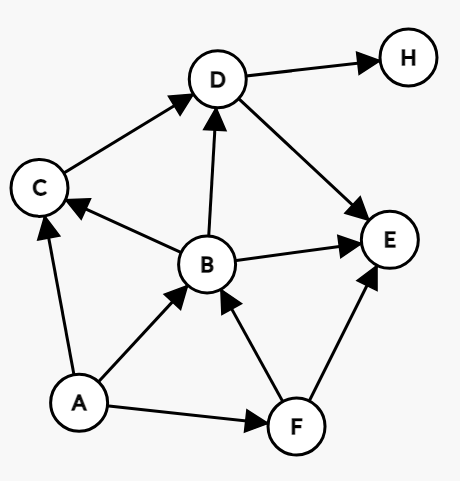

## GRPA 3

In [61]:
def longest_path(adj_list):
  topological_order = topological_sort(adj_list)

  distance = {u: -1 for u in adj_list}
  predecessor = {u: None for u in adj_list}  # NEW

  start_vertex = topological_order[0]
  distance[start_vertex] = 0

  for parent in topological_order:
    if distance[parent] != -1:
      for child in adj_list[parent]:
        new_distance = distance[parent] + 1
        if new_distance > distance[child]:
          distance[child] = new_distance
          predecessor[child] = parent
  return distance, predecessor


def display_path_info(distances, predecessor):
  # display information for visualization
  sorted_vertices = sorted(distances, key=distances.get)
  display([(vertex, distances[vertex], predecessor[vertex]) for vertex in sorted_vertices])


def reconstruct_path(last_city, predecessor):
  path = []

  while last_city is not None:
    path.append(last_city)
    last_city = predecessor[last_city]
  path.reverse()
  return path


def long_journey(adj_list):
  distance, predecessor = longest_path(adj_list)
  # display_path_info(distance, predecessor)
  last_city = max(distance, key=distance.get)
  return reconstruct_path(last_city, predecessor)

In [65]:
adjacency_list = {'Agra': ['Ranthambore'],
                  'Ajanta': ['Ellora', 'Aurangabad'],
                  'Aurangabad': ['Mumbai'],
                  'Bangalore': ['Chennai', 'Madurai'],
                  'Bodhgaya': ['Kolkatta'],
                  'Chennai': ['Madurai'],
                  'Delhi': ['Jaipur', 'Agra', 'Sravasti'],
                  'Ellora': ['Aurangabad'],
                  'Gir': [],
                  'Goa': ['Bangalore'],
                  'Jaipur': ['Pushkar'],
                  'Kanyakumari': [],
                  'Khajuraho': ['Ajanta'],
                  'Kolkatta': ['Ajanta', 'Bangalore', 'Chennai'],
                  'Kushinagar': ['Sarnath', 'Vaishali'],
                  'Leh': ['Shimla'],
                  'Madurai': ['Kanyakumari'],
                  'Mumbai': ['Goa'],
                  'Pushkar': ['Udaipur', 'Ranthambore'],
                  'Ranthambore': ['Khajuraho'],
                  'Rishikesh': ['Delhi'],
                  'Sarnath': ['Varanasi'],
                  'Shimla': ['Rishikesh'],
                  'Sravasti': ['Kushinagar'],
                  'Udaipur': ['Gir', 'Ajanta'],
                  'Vaishali': [],
                  'Varanasi': ['Khajuraho', 'Bodhgaya']}

expected_output = ['Leh', 'Shimla', 'Rishikesh', 'Delhi', 'Sravasti', 'Kushinagar', 'Sarnath', 'Varanasi', 'Bodhgaya',
                   'Kolkatta', 'Ajanta', 'Ellora', 'Aurangabad', 'Mumbai', 'Goa', 'Bangalore', 'Chennai', 'Madurai', 'Kanyakumari']

long_journey(adjacency_list) == expected_output

True

## Week 5

## dijkstra's algo

In [8]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]

In [9]:
def dijkstra(adj_list, start):
  visited = {u: False for u in adj_list}
  distance = {u: float('inf') for u in adj_list}
  distance[start] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start)

  while not pq.is_empty():
    curr_vertex = pq.dequeue()
    visited[curr_vertex] = True
    for neighbor, weight in adj_list[curr_vertex]:
      if not visited[neighbor]:
        new_distance = distance[curr_vertex]+weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)
  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

In [11]:
adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A') == {'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

True

## Bellman ford

In [13]:
def bellman_ford(adj_list, start):
  distance = {u: float('inf') for u in adj_list}
  distance[start] = 0

  for _ in range(len(adj_list) - 1):
    for u in adj_list:
      for v, weight in adj_list[u]:
        new_distance = distance[u] + weight
        if new_distance < distance[v]:
          distance[v] = new_distance
  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

bellman_ford(adjacency_list, 0) == {0: 0, 1: 10, 2: 16, 3: 86, 4: 30, 5: 80, 6: 35}

True

In [15]:
adjacency_list = {
    'S': [('E', 8), ('A', 10)],
    'E': [('D', 1)],
    'A': [('C', 2)],
    'D': [('A', -4), ('C', -1)],
    'B': [('A', 1)],
    'C': [('B', -2)],
}

bellman_ford(adjacency_list, 'S') == {'S': 0, 'E': 8, 'A': 5, 'D': 9, 'B': 5, 'C': 7}

True

## Floyd Warshall

In [19]:
def floyd_warshall(adj_list):
  dist = {u: {v: float('inf') for v in adj_list} for u in adj_list}
  for u in adj_list:
    dist[u][u] = 0
    for v, weight in adj_list[u]:
      dist[u][v] = weight

  for k in adj_list:
    for i in adj_list:
      for j in adj_list:
        if dist[i][j] > dist[i][k] + dist[k][j]:
          dist[i][j] = dist[i][k] + dist[k][j]
  return dist


adjacency_list = {0: [(1, 10), (7, 8)],
                  1: [(5, 2)],
                  2: [(1, 1), (3, 1)],
                  3: [(4, 3)],
                  4: [(5, -1)],
                  5: [(2, -2)],
                  6: [(1, -4), (5, -1)],
                  7: [(6, 1)]}

dist = floyd_warshall(adjacency_list)
display(dist)

# validating the output (printing distances like a matrix)
[list(dist[u].values()) for u in adjacency_list]

{0: {0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8},
 1: {0: inf, 1: 0, 2: 0, 3: 1, 4: 4, 5: 2, 6: inf, 7: inf},
 2: {0: inf, 1: 1, 2: 0, 3: 1, 4: 4, 5: 3, 6: inf, 7: inf},
 3: {0: inf, 1: 1, 2: 0, 3: 0, 4: 3, 5: 2, 6: inf, 7: inf},
 4: {0: inf, 1: -2, 2: -3, 3: -2, 4: 0, 5: -1, 6: inf, 7: inf},
 5: {0: inf, 1: -1, 2: -2, 3: -1, 4: 2, 5: 0, 6: inf, 7: inf},
 6: {0: inf, 1: -4, 2: -4, 3: -3, 4: 0, 5: -2, 6: 0, 7: inf},
 7: {0: inf, 1: -3, 2: -3, 3: -2, 4: 1, 5: -1, 6: 1, 7: 0}}

[[0, 5, 5, 6, 9, 7, 9, 8],
 [inf, 0, 0, 1, 4, 2, inf, inf],
 [inf, 1, 0, 1, 4, 3, inf, inf],
 [inf, 1, 0, 0, 3, 2, inf, inf],
 [inf, -2, -3, -2, 0, -1, inf, inf],
 [inf, -1, -2, -1, 2, 0, inf, inf],
 [inf, -4, -4, -3, 0, -2, 0, inf],
 [inf, -3, -3, -2, 1, -1, 1, 0]]

In [21]:

adjacency_list = {
    1: [(3, -2)],
    2: [(1, 4), (3, 3)],
    3: [(4, 2)],
    4: [(2, -1)],
}

dist = floyd_warshall(adjacency_list)
display(dist)

# validating the output (printing distances like a matrix)
[list(dist[u].values()) for u in adjacency_list]
dist == {1: {1: 0, 2: -1, 3: -2, 4: 0},
         2: {1: 4, 2: 0, 3: 2, 4: 4},
         3: {1: 5, 2: 1, 3: 0, 4: 2},
         4: {1: 3, 2: -1, 3: 1, 4: 0}}

{1: {1: 0, 2: -1, 3: -2, 4: 0},
 2: {1: 4, 2: 0, 3: 2, 4: 4},
 3: {1: 5, 2: 1, 3: 0, 4: 2},
 4: {1: 3, 2: -1, 3: 1, 4: 0}}

[[0, -1, -2, 0], [4, 0, 2, 4], [5, 1, 0, 2], [3, -1, 1, 0]]

True

## Prim's algo

In [25]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))  # (priority is weight, item is (u, v))

  def dequeue(self):
    return heapq.heappop(self.heap)  # returns (weight, (u, v))


def prim(adj_list, start):
  mst = []
  pq = PriorityQueue()
  visited = {u: False for u in adj_list}
  visited[start] = True

  for v, weight in adj_list[start]:
    pq.enqueue(weight, (start, v))

  while not pq.is_empty():
    weight, (u, v) = pq.dequeue()
    if not visited[v]:
      mst.append((u, v, weight))
      visited[v] = True
      for adj_vertex, weight in adj_list[v]:
        pq.enqueue(weight, (v, adj_vertex))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

mst = prim(adjacency_list, 0)
print("minimum spanning tree (mst):", mst)

minimum spanning tree (mst): [(0, 2, 6), (2, 1, 4), (2, 3, 11)]


In [27]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

prim(adjacency_list, 'A') == [('A', 'B', 2),
                              ('A', 'C', 3),
                              ('C', 'E', 1),
                              ('A', 'D', 3),
                              ('C', 'F', 6),
                              ('F', 'G', 9)]

True

## kruskal algo

In [31]:
def kruskal(adj_list):
  mst = []

  edges = []
  for u in adj_list:
    for v, weight in adj_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  parent = {u: u for u in adj_list}

  def find(node):
    while parent[node] != node:
      node = parent[node]
    return node

  def union(u, v):
    root1 = find(u)
    root2 = find(v)
    if root1 != root2:
      parent[root2] = root1
      return True
    return False

  # ufs above👆
  for weight, u, v in edges:
    if union(u, v):
      mst.append((u, v, weight))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

mst = kruskal(adjacency_list)
print("minimum spanning tree (mst):", mst)
mst == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

minimum spanning tree (mst): [(1, 2, 4), (0, 2, 6), (2, 3, 11)]


True

In [33]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

kruskal(adjacency_list) == [('C', 'E', 1),
                            ('A', 'B', 2),
                            ('A', 'C', 3),
                            ('A', 'D', 3),
                            ('C', 'F', 6),
                            ('F', 'G', 9)]

True